In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
data = pd.read_csv('/content/cleaned_data (1).csv')

In [17]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
            'exang', 'oldpeak', 'slope', 'ca', 'thal' , 'degree']
target = 'target'

In [18]:
data[features] = data[features].apply(pd.to_numeric, errors='coerce')
data[target] = pd.to_numeric(data[target], errors='coerce')

In [19]:
data = data.dropna()

In [20]:
X = data[features]
y = data[target]

In [21]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [22]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1  # Components for 95% variance

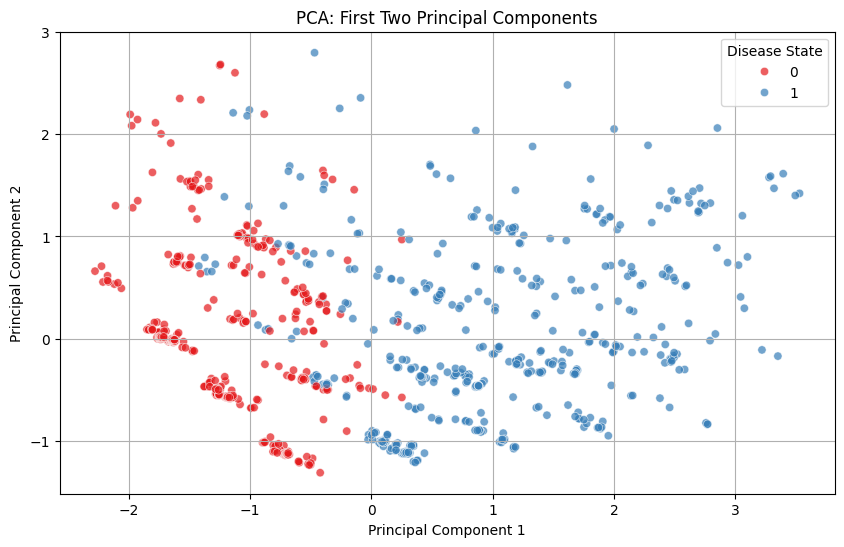

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', alpha=0.7)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Disease State')
plt.grid(True)
plt.show()

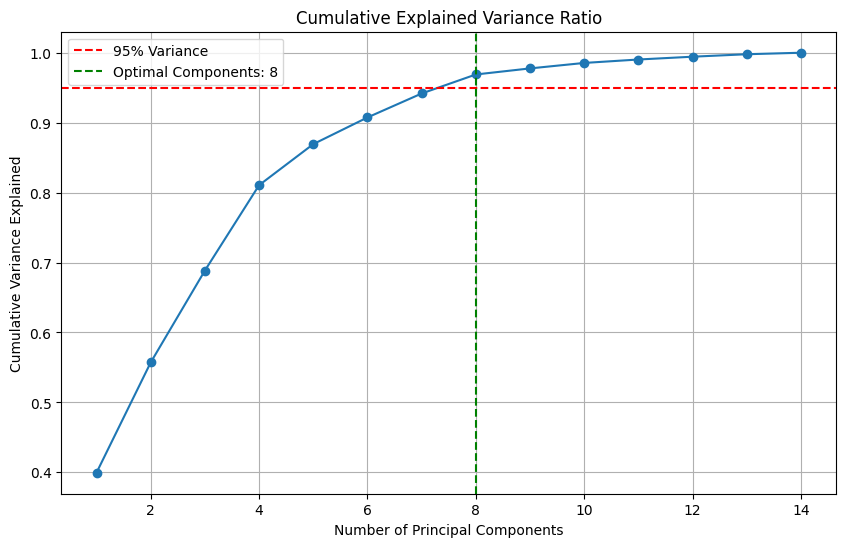

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.axvline(x=optimal_components, color='g', linestyle='--',
            label=f'Optimal Components: {optimal_components}')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(features))],
                        index=features)
print("\nFeature Loadings (Contributions to Principal Components):")
print(loadings)


Feature Loadings (Contributions to Principal Components):
               PC1       PC2       PC3       PC4       PC5       PC6  \
age       0.050970  0.034055 -0.004527 -0.027118  0.010945  0.004085   
sex      -0.090884  0.027265  0.036866 -0.040451 -0.082950  0.018616   
cp        0.469477 -0.554072  0.629320 -0.188732 -0.086082 -0.177764   
trestbps  0.014943  0.016929 -0.004424 -0.001609  0.022617  0.038352   
chol      0.004793  0.000627  0.007443 -0.009361 -0.000289  0.010243   
fbs       0.034888  0.064620 -0.011717 -0.039628  0.058598 -0.182190   
restecg   0.126121  0.736147  0.425725 -0.491183  0.086098  0.019690   
thalch   -0.054182  0.042320  0.007652  0.006619 -0.079398 -0.039458   
exang     0.176611 -0.103465  0.078244  0.022202  0.291079  0.907628   
oldpeak   0.056808  0.003948 -0.014348 -0.010247  0.070813  0.077321   
slope     0.086850 -0.077976 -0.116615 -0.044610  0.918188 -0.306223   
ca        0.044437  0.073476  0.017799  0.018294 -0.066354 -0.010167   
thal 

In [26]:
top_components = loadings.iloc[:, :optimal_components]
selected_features = []
for col in top_components.columns:
    high_loadings = top_components.index[abs(top_components[col]) > 0.3].tolist()
    selected_features.extend(high_loadings)
selected_features = list(set(selected_features))  # Remove duplicates
print(f"\nSelected features based on high loadings: {selected_features}")


Selected features based on high loadings: ['thal', 'degree', 'exang', 'fbs', 'restecg', 'slope', 'sex', 'cp']


In [27]:
PCA_data = data[['sex', 'fbs', 'exang', 'restecg', 'thal', 'cp', 'slope']]

In [28]:
PCA_data.head()

,sex,fbs,exang,restecg,thal,cp,slope
0,0,1,0,2,1,0,2
1,0,0,1,2,0,3,1
2,0,0,1,2,2,3,1
3,0,0,0,0,0,2,2
4,1,0,0,2,0,1,0


In [29]:
PCA_data.to_csv("PCA_Features" , index=False)